In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

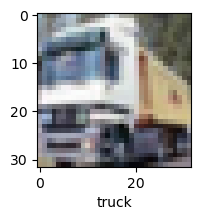

In [12]:
plot_sample(X_train, y_train, 1)

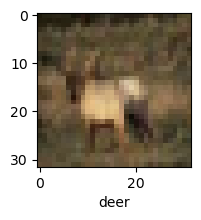

In [13]:
plot_sample(X_train, y_train, 3)

### Normalizing the Data

In [14]:
X_train = X_train / 255
X_test = X_test / 255

### Build simple artificial neural network for image classification

In [18]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation="relu"),
    layers.Dense(1000, activation="relu"),
    layers.Dense(10, activation="softmax")
])

ann.compile(optimizer="SGD",
            loss = "sparse_categorical_crossentropy",
            metrics=["accuracy"])

ann.fit(X_train, y_train, epochs=5)

Metal device set to: Apple M1


2023-01-21 09:15:37.362082: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-21 09:15:37.362367: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/5


2023-01-21 09:15:38.593537: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-21 09:15:38.712419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 21s 13ms/step - loss: 1.8184 - accuracy: 0.3517
Epoch 2/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.6264 - accuracy: 0.4235
Epoch 3/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5436 - accuracy: 0.4580
Epoch 4/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4833 - accuracy: 0.4801
Epoch 5/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4323 - accuracy: 0.4965


In [19]:
ann.evaluate(X_test, y_test)

 16/313 [>.............................] - ETA: 2s - loss: 1.7663 - accuracy: 0.3848

2023-01-21 09:17:35.047222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step - loss: 1.6797 - accuracy: 0.4194


[1.6796766519546509, 0.41940000653266907]

In [20]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

 32/313 [==>...........................] - ETA: 1s

2023-01-21 09:17:54.062161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.66      0.53      1000
           1       0.45      0.74      0.56      1000
           2       0.46      0.11      0.18      1000
           3       0.49      0.10      0.16      1000
           4       0.30      0.55      0.38      1000
           5       0.51      0.20      0.29      1000
           6       0.62      0.28      0.38      1000
           7       0.34      0.74      0.47      1000
           8       0.72      0.25      0.37      1000
           9       0.46      0.57      0.51      1000

    accuracy                           0.42     10000
   macro avg       0.48      0.42      0.38     10000
weighted avg       0.48      0.42      0.38     10000



# Build a Convolutional Neural Network

In [23]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [25]:
cnn.compile(optimizer="adam",
             loss = "sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [26]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10


2023-01-21 09:28:23.803752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 17s 10ms/step - loss: 1.4735 - accuracy: 0.4699
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1218 - accuracy: 0.6102
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9936 - accuracy: 0.6551
Epoch 4/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9079 - accuracy: 0.6851
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8450 - accuracy: 0.7067
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7841 - accuracy: 0.7282
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7373 - accuracy: 0.7433
Epoch 8/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6913 - accuracy: 0.7594
Epoch 9/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6484 - accuracy: 0.7754
Epoch 10/10
1563/1563 [==============================] - 16s 10ms/step - lo

In [27]:
cnn.evaluate(X_test, y_test)

 20/313 [>.............................] - ETA: 1s - loss: 0.8980 - accuracy: 0.7188

2023-01-21 09:31:00.696631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 0.9255 - accuracy: 0.6926


[0.9255183935165405, 0.6926000118255615]

In [39]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [28]:
y_pred = cnn.predict(X_test)
y_pred[:5]

 51/313 [===>..........................] - ETA: 0s

2023-01-21 09:31:02.738776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step


array([[2.3661340e-03, 1.1850568e-05, 1.6951181e-03, 8.9192492e-01,
        3.1797383e-03, 9.9968374e-02, 2.9309970e-04, 2.8469622e-05,
        3.3699552e-04, 1.9535908e-04],
       [2.5817307e-02, 2.8783934e-02, 4.3217762e-05, 6.0636561e-05,
        2.9851715e-06, 8.7217422e-06, 1.4230828e-06, 1.5654150e-06,
        9.4463754e-01, 6.4263202e-04],
       [2.2975350e-02, 4.0888418e-02, 8.3465833e-04, 3.5239451e-03,
        5.4147845e-04, 9.2925265e-04, 5.1116542e-04, 2.3624969e-03,
        8.9595377e-01, 3.1479362e-02],
       [7.5032026e-01, 6.3317193e-04, 7.7499703e-02, 3.0824985e-02,
        6.9867953e-04, 1.5720131e-04, 3.6276015e-03, 7.2679715e-04,
        1.3543476e-01, 7.6870107e-05],
       [5.4594657e-05, 1.3151638e-05, 7.8944080e-03, 5.2737720e-02,
        8.0534071e-01, 3.4515146e-02, 9.9421300e-02, 8.2835477e-06,
        8.5888587e-06, 6.1616292e-06]], dtype=float32)

In [40]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [41]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

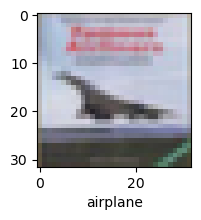

In [42]:
plot_sample(X_test, y_test,3)

In [43]:
classes[y_classes[3]]

'airplane'

In [44]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.68      0.73      1000
           1       0.84      0.79      0.82      1000
           2       0.64      0.55      0.59      1000
           3       0.41      0.68      0.51      1000
           4       0.72      0.54      0.62      1000
           5       0.60      0.56      0.58      1000
           6       0.85      0.69      0.76      1000
           7       0.75      0.77      0.76      1000
           8       0.79      0.85      0.82      1000
           9       0.74      0.83      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.70     10000
weighted avg       0.71      0.69      0.70     10000



# Handwritten Digits Classification using CNN

In [46]:
from tensorflow import keras

In [47]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [48]:
X_train.shape

(60000, 28, 28)

In [49]:
X_test.shape

(10000, 28, 28)

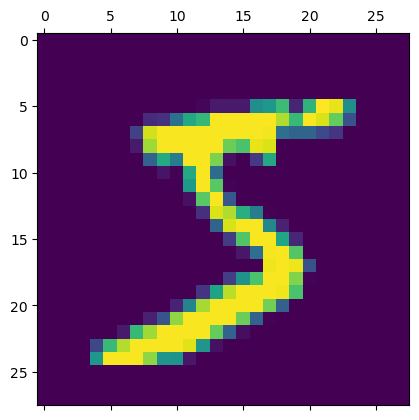

In [51]:
plt.matshow(X_train[0])

In [52]:
X_train = X_train / 255
X_test = X_test / 255

### Using ANN for Classification

In [53]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

ann.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
  25/1875 [..............................] - ETA: 7s - loss: 1.7117 - accuracy: 0.5425

2023-01-21 09:45:45.236515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.2734 - accuracy: 0.9216
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1238 - accuracy: 0.9635
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0880 - accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0661 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0536 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0441 - accuracy: 0.9862
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0355 - accuracy: 0.9889
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0284 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0232 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0199 - accurac

In [54]:
ann.evaluate(X_test, y_test)

 40/313 [==>...........................] - ETA: 1s - loss: 0.0914 - accuracy: 0.9734

2023-01-21 09:47:00.208713: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.0809 - accuracy: 0.9776


[0.08093953877687454, 0.9776000380516052]

In [56]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [57]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

### Using CNN for Classification

In [58]:
cnn = keras.Sequential([
    layers.Conv2D(30, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(100, activation="relu"),
    layers.Dense(10, activation="sigmoid")
])

In [59]:
cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5


2023-01-21 09:51:16.932786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 15s 7ms/step - loss: 0.1554 - accuracy: 0.9535
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0532 - accuracy: 0.9839
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0340 - accuracy: 0.9895
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0235 - accuracy: 0.9925
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0166 - accuracy: 0.9948


In [60]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [61]:
cnn.evaluate(X_test, y_test)

 31/313 [=>............................] - ETA: 1s - loss: 0.0427 - accuracy: 0.9839

2023-01-21 09:52:27.840487: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.0397 - accuracy: 0.9874


[0.03973891958594322, 0.9874000549316406]